In [ ]:
!pip install pyLDAvis==3.3.1 gensim==3.8.3 spacy==3.1.3

!pip install spacy
#!python -m spacy download es_core_news_md
#python -m spacy download en_core_web_md
#!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg

!pip install demoji
!pip install emoji --upgrade

     |████████████████████████████████| 568.4 MB 11 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [ ]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.models.ldamodel import LdaModel
# Importing modules
import pandas as pd
import os


In [ ]:

os.chdir('..')
# Read data into papers
papers = pd.read_csv('/content/drive/MyDrive/NLP/dades.csv')
# Print head4
papers.head()
papers.tail()

,_id.oid,date.date,favorites,hashtags,idTweet.numberLong,location,retweets,text,username
2405212,620ce68ceba4ecfa0b6fe500,2022-02-16T11:54:48.000Z,0.0,[],1.493917e+18,Madrid,0.0,📌 “Uno llega a ser grande por lo que lee y no ...,Luis Suárez
2405213,620ce68ceba4ecfa0b6fe501,2022-02-16T11:54:48.000Z,0.0,[],1.493917e+18,"Barcelona, España",0.0,¿Os acordáis del video shipper Crislu que hice...,henry
2405214,620ce68ceba4ecfa0b6fe502,2022-02-16T11:54:48.000Z,0.0,[],1.493917e+18,Madrid,0.0,@_TheJR_ @RamenParaDos jajajaja yo es que cuan...,marini ~ #Yorozuyaforever 🦉
2405215,620ce68ceba4ecfa0b6fe503,2022-02-16T11:54:48.000Z,0.0,"[""DefiendelaSanidad""]",1.493917e+18,SEVILLA,1.0,🚨 ¡La sanidad pública andaluza está en la UCI!...,Dulce
2405216,620ce68ceba4ecfa0b6fe504,2022-02-16T11:54:47.000Z,2.0,[],1.493917e+18,Madrid,0.0,@AhoraRo @Mr_k98k 😂😂😂\nHas despertado a la bes...,Labruja 🐝/🖕


In [ ]:
# Remove the columns
papers = papers.drop(columns=['_id.oid', 'date.date', 'favorites','hashtags', 'idTweet.numberLong', 'location','retweets','username'], axis=1)


# sample only 100 papers
papers = papers.sample(41034) # 20% de lenght

#papers = papers.sample(481034) # 20% de lenght
# Print out the first rows of papers

papers.head()
papers.tail()

,text
1490753,ya estoy en la fase picosa de los dos tatuajes...
1943773,se le olvida contestar y a los cuatro días me ...
259018,Real que si me acaba de pasar lo mismo 😂😂😂😂 me...
163175,@edgarelsniper me pido ser la rueda a la que l...
494503,@Gurutxe1 Ah! Pero no es un tío ? 😂😂😂😂


In [ ]:
import random
import numpy as np
file = '/content/drive/MyDrive/NLP/dades.csv'
np.random.seed(4)
paper1 = pd.read_csv(file, header=0,
            skiprows=lambda i: i>0 and np.random.choice(50))


paper1.head()
paper1.tail()

paper2 = paper1.drop(columns=['_id.oid', 'date.date', 'favorites','hashtags', 'idTweet.numberLong', 'location','retweets','username'], axis=1)
paper2.head()
paper2.tail()
papers = paper2

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['text'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
#paper1['text'] = paper1['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['text'] = papers['text'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text'].head()





<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<input>:4: DeprecationWarning: invalid escape sequence \.
<ipython-input-31-88003b1c641b>:4: DeprecationWarning: invalid escape sequence \.
  papers['text'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))


0      @guillezzzzz n vd ojalá ser bollera #putoshbres
1    @voz_populi ¡vamos para bingo¡ que país y que ...
2    ☀️ “grande es aquel que para brilla no necesit...
3                umami en guaro https://tco/wsgijjfrq3
4    los eurodiputados piden a macron presidente de...
Name: text, dtype: object

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import re
import demoji
import emoji
from emoji import UNICODE_EMOJI
  
demoji.download_codes()
# treu les ñ mirar com no trure emogis i substituir
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data = papers.text.values.tolist()
print("Text sense canvis:") 
print(data[0])
print(data[1])
print(data[2])
print(data[3])

def find(string):
  regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
  url = re.findall(regex,string)
  return [x[0] for x in url]

pepe = []  
for i in data:
  if (len(find(i)) > 0):
    trobat = find(i)
    for j in trobat:
      #print("Urls: ", j)
      pepe.append(i.replace(j,"Youtube_Video"))
  else:
    pepe.append(i) 
print(" Text NO URLs:")     
print(pepe[0])
print(pepe[1])
print(pepe[2])
print(pepe[3])

gus= []
for i in pepe:
  maria = emoji.demojize(i, language='es')
  gus.append(maria)

print("Text emoji to string:")
print(gus[0])
print(gus[1])
print(gus[2])
print(gus[3])

data = gus

data_words = list(sent_to_words(data))
print("Text to list:") 
print(data_words[0])
print(data_words[1])
print(data_words[2])
print(data_words[3])
j = 0

for i in data_words:
  if j < 15:
    print("Diferencies:", j)
    print(i)
    print(gus[j])
    j= j+1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  


Text sense canvis:
@guillezzzzz n vd ojalá ser bollera #putoshbres
@voz_populi ¡vamos para bingo¡ que país y que consejeros🤬🤬🤬
☀️ “grande es aquel que para brilla no necesita apagar la luz de los demás”
umami en guaro https://tco/wsgijjfrq3
 Text NO URLs:
@guillezzzzz n vd ojalá ser bollera #putoshbres
@voz_populi ¡vamos para bingo¡ que país y que consejeros🤬🤬🤬
☀️ “grande es aquel que para brilla no necesita apagar la luz de los demás”
umami en guaro Youtube_Video
Text emoji to string:
@guillezzzzz n vd ojalá ser bollera #putoshbres
@voz_populi ¡vamos para bingo¡ que país y que consejeros:cara_con_símbolos_en_la_boca::cara_con_símbolos_en_la_boca::cara_con_símbolos_en_la_boca:
:sol: “grande es aquel que para brilla no necesita apagar la luz de los demás”
umami en guaro Youtube_Video
Text to list:
['guillezzzzz', 'vd', 'ojalá', 'ser', 'bollera', 'putoshbres']
['voz_populi', 'vamos', 'para', 'bingo', 'que', 'país', 'que', 'consejeros']
['sol', 'grande', 'es', 'aquel', 'que', 'para', 'bri

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [ ]:
#NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
print("Stopwords pre determinades:",stop_words)
stop_words.extend(['buenos', '-', 'http_co','https_tco', 'jajajajaja', 'dia','ext_ud','xwzey','lqxqyb',' ','_',''])
print("Stopwords afegides determinades:",stop_words)
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN','PROPN']):
#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def lemmatizationTOT(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Stopwords pre determinades: ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)


#pepe = []
#for i in data_words_nostops:
  #for j in i:
    #pepe.append(j.replace("http_co"," "))
    #pepe.append(j.replace("https_tco"," "))

#data_words_nostops = pepe
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#nlp = spacy.load("es_core_news_md")
#data_lemmatizedMD = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])

#nlp = spacy.load("en_core_news_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatizedAmbTot = lemmatizationTOT(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#data_lemmatizedNAV = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB'])
#data_lemmatizedNA = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ'])
#nlp = spacy.load("es_core_news_sm")
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])

j = 0
#with open("/content/drive/MyDrive/NLP/TokensWords.txt", "w")as external_file:
"""for i in data_words_bigrams: 
  if (j< 30):
    doc = nlp(" ".join(i))
    for token in doc:
      print("Tipus de paraula SM:", j, token.text, token.pos_, token.dep_)
    j = j+ 1
  #external_file.close()   
 """   
    #texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
nlp = spacy.load("es_core_news_lg")
data_lemmatizedLG = lemmatization(data_words_bigrams, allowed_postags=['NOUN','PROPN'])
j = 0
for i in data_words_bigrams:
  if (j< 7):
    doc = nlp(" ".join(i))
    for token in doc:
      print("Tipus de paraula LG:", j, token.text, token.pos_, token.dep_)
    j = j+ 1

pepe = []

for i in data_lemmatizedLG:
  llista = []
  for j in i:
    llista.append(j.replace("-","").replace("http_tco","").replace("https_tco","").replace("_",""))
  pepe.append(llista)
  
    

data_lemmatizedFinal = pepe    
j = 0
for i in data_words_nostops:
  if j < 8:
    print(j)
    print("Text normal                        ", data_words[j])
    print("text nostops:                      ", i)
    print("Text to convert without Stopwords: ", data_words_bigrams[j])
    #print("Text lemmatized NOUNs and PROPN MF ",data_lemmatizedMD[j])
    #print("Text lemmatized NOUNs and PROPN    ",data_lemmatized[j])
    print("Text lemmatized NOUNs and PROPN LG ",data_lemmatizedLG[j])
    print("Text lemmatized NOUNs and PROPN FINAL",data_lemmatizedFinal[j])
    j= j+1 


#print("diference 3:") 
#print("data_words",data_words[3])
#print("No Stop Words",data_words_nostops[3])
#print(data_lemmatizedAmbTot[3])
#print(data_lemmatizedNAV[3])
#print(data_lemmatizedNA[3])
#print(data_lemmatized[3])

Tipus de paraula LG: 0 guillezzzzz PROPN nsubj
Tipus de paraula LG: 0 vd PROPN flat
Tipus de paraula LG: 0 ojalá INTJ aux
Tipus de paraula LG: 0 ser AUX cop
Tipus de paraula LG: 0 bollera NOUN ROOT
Tipus de paraula LG: 0 putoshbres ADJ amod
Tipus de paraula LG: 1 voz_populi PROPN nsubj
Tipus de paraula LG: 1 vamos AUX ROOT
Tipus de paraula LG: 1 bingo PROPN obj
Tipus de paraula LG: 1 país PROPN obj
Tipus de paraula LG: 1 consejeros PROPN obj
Tipus de paraula LG: 2 sol NOUN obl
Tipus de paraula LG: 2 grande ADJ amod
Tipus de paraula LG: 2 aquel PRON det
Tipus de paraula LG: 2 brilla VERB nsubj
Tipus de paraula LG: 2 necesita VERB ROOT
Tipus de paraula LG: 2 apagar VERB xcomp
Tipus de paraula LG: 2 luz NOUN obj
Tipus de paraula LG: 2 demás PRON obj
Tipus de paraula LG: 3 umami PROPN ROOT
Tipus de paraula LG: 3 guaro ADJ flat
Tipus de paraula LG: 3 youtube_video ADV flat
Tipus de paraula LG: 4 eurodiputados NOUN nsubj
Tipus de paraula LG: 4 piden VERB ROOT
Tipus de paraula LG: 4 macron VE

# Create Dictionary, Corpus 

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedFinal)
# Create Corpus
texts = data_lemmatizedFinal
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
for i in texts:
  print(i)

print(corpus[:1])
print(corpus[:2])
print(corpus[:3])
print(corpus[:4])


Se han truncado las últimas 5000 líneas del flujo de salida.
['pobreza', 'top', 'canción', 'badbunny', 'eh']
['cariño', 'libertad', 'maquille', 'youtubevideo']
['nsscloud', 'merypalvarez', 'acuerdo']
['missprincesa', '', 'agujero']
['rata', 'youtubevideo']
['paso', 'tío', 'mazo']
['equipo', 'diferencia']
['minuto', 'españa', 'covid', 'día', 'minutos', 'noticia']
['fala']
['profesor', 'teatro', 'suelo', 'duda', 'prueba']
['pmunoziturrieta', 'otto', 'acto', 'ejemplaridad']
['joanrlaporte', 'búscalo', 'congreso']
['puesto', 'noche', 'carasinboca']
['lápida', 'muchacho']
[]
['puente']
[]
['portapapel', 'alimento', 'menudo', 'baj']
['joselopezbnitez', 'eldiarioes', 'váyase']
['of', 'arise', 'corazón', 'bronze', 'talesofarise']
[]
['paso']
['cascal', 'modo']
['instituto', 'nova', 'historia', 'catalunya', 'caso']
['realbetis', 'día', 'andalucia', 'bandera', 'portugal']
['marcela', 'rm', 'tom']
['mondá']
['cris', 'psicólogo', 'salseos', 'mundillo']
['twitch', 'youtubevideo']
['nicefatpaco', 'x

# Train LDA model

In [ ]:
# Train LDA model.
from gensim.models import LdaModel
from gensim.models.callbacks import PerplexityMetric
# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

random_state_prova = np.random.choice(50)
# Make a index to word dictionary.
##temp = dictionary[0]  # This is only to "load" the dictionary.
#id2word = dictionary.id2token

perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state = random_state_prova,
    callbacks=[perplexity_logger]
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -15.8834.
[([(0.035866924, 'vida'),
   (0.03170226, 'persona'),
   (0.025364392, 'hora'),
   (0.019817406, 'gracias'),
   (0.017208865, 'mujer'),
   (0.01341102, 'país'),
   (0.010729453, 'acuerdo'),
   (0.010506552, 'sol'),
   (0.010136135, 'niño'),
   (0.01002694, 'empresa'),
   (0.007566425, 'proyecto'),
   (0.0075364653, 'dato'),
   (0.007502176, 'voto'),
   (0.006424547, 'luz'),
   (0.0057115364, 'puesto'),
   (0.005709063, 'jaja'),
   (0.0055712936, 'través'),
   (0.005477585, 'sistema'),
   (0.005349168, 'joder'),
   (0.005312194, 'hija')],
  -14.60185006150333),
 ([(0.0412474, 'cosa'),
   (0.03033641, 'vez'),
   (0.026666924, 'tiempo'),
   (0.017319964, 'hombre'),
   (0.012812836, 'libro'),
   (0.010831161, 'hola'),
   (0.0105441995, 'paso'),
   (0.010413622, 'cuenta'),
   (0.0098810475, 'razón'),
   (0.009704051, 'millón'),
   (0.009151136, 'mano'),
   (0.008311334, 'ejemplo'),
   (0.007798041, 'grupo'),
   (0.007576361, 'nombre'),
   (0.00701335, 'fin

# Grafica LDA Model 

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.358125  0.004684       1        1  14.654010
4      0.044506 -0.104629       2        1  10.910313
6      0.047547  0.321002       3        1  10.861546
3      0.041403 -0.039463       4        1  10.025522
1      0.041841 -0.046996       5        1   9.942386
9      0.042782 -0.076507       6        1   9.839803
5      0.037677 -0.020173       7        1   8.972376
2      0.034831 -0.013707       8        1   8.409448
7      0.033972 -0.012305       9        1   8.368022
0      0.033566 -0.011907      10        1   8.016574, topic_info=              Term         Freq        Total Category  logprob  loglift
16    youtubevideo  6794.000000  6794.000000  Default  30.0000  30.0000
309                 2852.000000  2852.000000  Default  29.0000  29.0000
35             día  2257.000000  2257.000000  Default  28.0000  28.0000
132            año   954.000000   954.000000  Default  27.0000  27.0000
429           cosa   681.000000   681.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1226         ostia    60.720271    61.650116  Topic10  -5.3805   2.5085
823          super    60.623056    61.552892  Topic10  -5.3821   2.5084
3220        perfil    60.583498    61.513352  Topic10  -5.3828   2.5084
1224        escena    59.425972    60.355848  Topic10  -5.4021   2.5081
497         málaga    57.888504    58.818369  Topic10  -5.4283   2.5077

[330 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
309       5  0.999573              
3576      8  0.980246        abrazo
573       3  0.996928       acuerdo
813       8  0.973537   advertencia
1967      1  0.986156          agua
...     ...       ...           ...
373       8  0.994587       youtube
16        1  0.999805  youtubevideo
1109      5  0.984516          zona
175       2  0.993768         ánimo
1454     10  0.992091         éxito

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 5, 7, 4, 2, 10, 6, 3, 8, 1])

# Lda Model Multicore

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       #random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       random_state = random_state_prova,
                                       per_word_topics=True)

# Lda Model grafic

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.380306  0.004433       1        1  16.840135
1     -0.036723 -0.333930       2        1  11.812114
4     -0.039407  0.072090       3        1  10.063449
7     -0.042195  0.049644       4        1   9.790000
9     -0.041740  0.048514       5        1   9.305279
5     -0.042679  0.047469       6        1   9.256314
0     -0.044138  0.030708       7        1   8.760628
8     -0.044500  0.028653       8        1   8.724756
2     -0.044736  0.028153       9        1   8.268545
3     -0.044188  0.024266      10        1   7.178780, topic_info=               Term         Freq        Total Category  logprob  loglift
16     youtubevideo  6595.000000  6595.000000  Default  30.0000  30.0000
35              día  3128.000000  3128.000000  Default  29.0000  29.0000
309                  3080.000000  3080.000000  Default  28.0000  28.0000
132             año  1004.000000  1004.000000  Default  27.0000  27.0000
20          persona  1089.000000  1089.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
554           siglo    51.261717    52.291226  Topic10  -5.4395   2.6142
6040         juicio    50.857749    51.887361  Topic10  -5.4474   2.6140
11000          bale    49.751709    50.781213  Topic10  -5.4694   2.6136
8130          villa    49.007710    50.037273  Topic10  -5.4845   2.6133
5018          parís    57.768602    59.518454  Topic10  -5.3200   2.6042

[331 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
309       2  0.999817              
1044     10  0.992395         abril
573       1  0.993236       acuerdo
1967     10  0.992485          agua
3226     10  0.984336      albacete
...     ...       ...           ...
373       9  0.986966       youtube
16        1  0.999845  youtubevideo
1109     10  0.993145          zona
175       3  0.991636         ánimo
1454      5  0.990915         éxito

[302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 5, 8, 10, 6, 1, 9, 3, 4])

# Paraules per cada cluster

In [ ]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.041*"vez" + 0.028*"casa" + 0.019*"noticia" + 0.015*"pp" + 0.015*"cara" + '
  '0.012*"artículo" + 0.011*"cabeza" + 0.010*"canción" + 0.009*"corazón" + '
  '0.008*"jaja"'),
 (1,
  '0.159*"" + 0.016*"corazónrojo" + 0.015*"amor" + 0.015*"dios" + 0.014*"gana" '
  '+ 0.014*"momento" + 0.013*"información" + 0.011*"dinero" + 0.011*"prueba" + '
  '0.010*"caso"'),
 (2,
  '0.026*"mundo" + 0.022*"xd" + 0.017*"libro" + 0.015*"razón" + 0.013*"juego" '
  '+ 0.013*"hola" + 0.013*"calle" + 0.013*"imagen" + 0.010*"número" + '
  '0.010*"cambio"'),
 (3,
  '0.085*"año" + 0.041*"foto" + 0.024*"mes" + 0.019*"verano" + 0.017*"ley" + '
  '0.012*"sánchez" + 0.011*"duda" + 0.010*"agua" + 0.010*"zona" + '
  '0.008*"euros"'),
 (4,
  '0.066*"persona" + 0.030*"hora" + 0.025*"tiempo" + 0.016*"jajaja" + '
  '0.015*"problema" + 0.015*"paso" + 0.013*"gracia" + 0.012*"obra" + '
  '0.012*"tipo" + 0.011*"ciudad"'),
 (5,
  '0.034*"verdad" + 0.023*"clase" + 0.020*"psoe" + 0.018*"madre" + '
  '0.016*"punto" + 0.014*

# Coherence Score 

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatizedFinal, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6068997508670613


# Generació de grafiques 
per aconseguir nombre de topics

In [ ]:
# to evaluate the optimus number of topics
from gensim.models import LsiModel
from gensim.models import LdaModel
import matplotlib.pyplot as plt

from gensim.models import CoherenceModel

# to evaluate the optimus number of topics
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """
    Function to display num_topics - LDA graph using c_v coherence
   
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
   
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        #print(num_topics)
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state = random_state_prova)
         # print(lm)
        lm_list.append(lm)
        #print(lm_list)
        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        #print('\nCoherence Score: ', coherence_lda)
       # print("surt:")
        #print(coherence_lda)
        #cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        #print(cm)
        
        c_v.append(coherence_lda)
        #print(cm.get_coherence())

        #coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    #return coherence_model_lda.get_coherence()
       
    
   
    return lm_list, c_v


# %%time
lmlist_lsi, c_v = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=10, model= "ls")
lmlist_lsi1, c_v1 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=15, model= "ls")
#lmlist_lsi2, c_v2 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=10, model= "lsi")
#lmlist_lsi3, c_v3 = evaluate_graph(dictionary=id2word, corpus=corpus, texts=data_lemmatizedFinal, limit=15, model= "lsi")


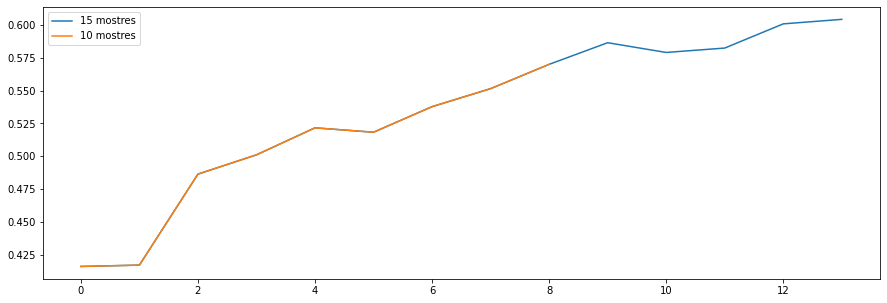

In [ ]:

plt.figure(figsize = (15, 5))
plt.plot(c_v1, label = '15 mostres')
plt.plot(c_v, label = '10 mostres')

plt.legend()

plt.show()

#plt.figure(figsize = (15, 5))
#plt.plot(c_v2, label = '10 mostres')
#plt.plot(c_v3, label = '15 mostres')
#plt.legend()

#plt.show()



# Nou LDA amb el num topic selecionat

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=1000,
                                           chunksize=2000,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9,
                                           random_state = random_state_prova)
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

SyntaxError: ignored

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

# Creacio de nou dataset

In [ ]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0, tweets = 0):
    # Init output
    sent_topics_df = pd.DataFrame()
   
    contents = pd.DataFrame()

    
   
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['hatespeech', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model_hate, corpus=corpus, texts=data_lemmatizedFinal)
print(df_topic_sents_keywords)

df_topic_sents_keywords.to_csv('DATASET1.csv')

https://www.geeksforgeeks.org/python-check-url-string/
https://colab.research.google.com/github/vitojph/kschool-nlp-18/blob/master/notebooks/spacy.ipynb#scrollTo=nXyqggTJwqeb

http://www.aic.uva.es/cuentapalabras/nubes-de-palabras.html